# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
import datetime as dt
from scipy.stats import linregress
import json
from ratelimit import limits
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)

output_data_file = (r"C:\Users\yenia\Desktop\JHU_Bootcamp\Homework\Whats-The-Weather-Like\WeatherPy\Data\cities.csv")
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


#limit calls per minute
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
one_minute = 60

@limits(calls=60, period=one_minute)
def call_api(url):
    response = requests.get(query_url)

    if response.status_code != 200:
        raise Exception('API response: {}'.format(response.status_code))
    return response

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Exploratory test 
test =  ["Houston"]
results = []
for city in test:
    query_url = f"{url}{api_key}&q={city}"
    response = requests.get(query_url)
    response_json = response.json()
print (json.dumps(response_json, indent = 4))   
print(response_json)
#test retrieval of data using test city
weather_id=response_json["weather"][0]["id"]
city_id = response_json["id"]
city_name_test = response_json["name"]
print(city_id,city_name_test)

{
    "coord": {
        "lon": -95.36,
        "lat": 29.76
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 62.83,
        "feels_like": 54.3,
        "temp_min": 60.8,
        "temp_max": 64,
        "pressure": 1017,
        "humidity": 44
    },
    "visibility": 10000,
    "wind": {
        "speed": 11.41,
        "deg": 290,
        "gust": 19.46
    },
    "clouds": {
        "all": 1
    },
    "dt": 1607283920,
    "sys": {
        "type": 1,
        "id": 4850,
        "country": "US",
        "sunrise": 1607259819,
        "sunset": 1607296929
    },
    "timezone": -21600,
    "id": 4699066,
    "name": "Houston",
    "cod": 200
}
{'coord': {'lon': -95.36, 'lat': 29.76}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 62.83, 'fe

In [4]:

#
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
city_name = []
lat =[]
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country =[]
date = []
# Loop through each city
for city in cities:
    query_url = f"{url}{api_key}&q={city}"
    
    try: 
        loop_response = requests.get(query_url).json()
        city_name.append(loop_response["name"])
        lat.append(loop_response["coord"]["lat"])
        lng.append(loop_response["coord"]["lon"])
        max_temp.append(loop_response["main"]["temp_max"])
        humidity.append(loop_response["main"]["humidity"])
        cloudiness.append(loop_response["clouds"]["all"])
        wind_speed.append(loop_response["wind"]["speed"])
        country.append(loop_response["sys"]["country"])
        date.append(loop_response["dt"])                    
        print(loop_response["id"],loop_response["name"])
    except:
        print("Not found.")
        pass

4032243 Vaini
1337607 Kudahuvadhoo
2239862 Malanje
3874787 Punta Arenas
2192362 Christchurch
2387546 Bozoum
5122534 Jamestown
Not found.
1735106 George Town
3833367 Ushuaia
2316259 Bulungu
Not found.
Not found.
4272340 Great Bend
2075265 Busselton
3366880 Hermanus
Not found.
3369157 Cape Town
1513491 Yangi Marg`ilon
3414079 Olafsvik
4726521 San Patricio
1649150 Bengkulu
3388618 São João do Piauí
3131824 Vigrestad
2110227 Butaritari
149027 Uyovu
3430863 Mar del Plata
3831208 Qaanaaq
2618795 Klaksvík
964420 Port Elizabeth
5289658 Chino Valley
1507390 Dikson
Not found.
3573374 The Valley
777019 Vardø
2016910 Severobaykal'sk
3421765 Nanortalik
2012530 Zhigansk
1486321 Yar-Sale
1213855 Sibolga
686090 Asău
2120591 Tilichiki
Not found.
4034551 Faanui
1015776 Bredasdorp
935215 Saint-Philippe
6620339 Karratha
3466704 Castro
3461733 Guiratinga
4676740 Brownsville
2092164 Lorengau
5106841 Albany
1213493 Teluk Nibung
Not found.
3405792 Benevides
6089245 Norman Wells
5554428 Ketchikan
6201424 Matau

Not found.
1633419 Padang
1501377 Kungurtug
2077895 Alice Springs
1267390 Kavaratti
103630 Najrān
2738381 Lata
4231997 Avera
1516589 Zhezkazgan
590030 Narva-Jõesuu
1528998 Yumen
2255564 Ouésso
4031637 Lavrentiya
Not found.
236901 Ouadda
2079582 Alyangula
522902 Nekhayevskiy
2270385 Camacha
872144 Sovkhoznyy
Not found.
3136690 Stokmarknes
3444105 San Matías
330534 Mīzan Teferī
3703647 Pacora
778707 Mehamn
2028164 Deputatsky
Not found.
3436674 Yaguarón
Not found.
3141332 Røros
3125287 Cervo
1817240 Baiyin
4036284 Alofi
5762718 Belle Fourche
5870133 Nome
5367788 Lompoc
2065594 Mount Isa
1688696 San Policarpo
5905393 Bonavista
4513583 Hamilton
3392251 Pesqueira
897045 Solwezi
2121025 Srednekolymsk
1626542 Sorong
2656847 Atherton
3354077 Opuwo
87205 Darnah
2276492 Harper
4034496 Fare
5528182 Pecos
1684803 Tabuk
3884373 La Serena
2109701 Auki
2208248 Kaitangata
2654993 Bradford
3443631 Bella Union
Not found.
1180295 Dera Bugti
3982837 Sonoita
3457772 Marechal Cândido Rondon
2036892 Hohhot
12

In [5]:
#Check to make sure names were appended
print(city_name)

['Vaini', 'Kudahuvadhoo', 'Malanje', 'Punta Arenas', 'Christchurch', 'Bozoum', 'Jamestown', 'George Town', 'Ushuaia', 'Bulungu', 'Great Bend', 'Busselton', 'Hermanus', 'Cape Town', 'Yangi Marg`ilon', 'Olafsvik', 'San Patricio', 'Bengkulu', 'São João do Piauí', 'Vigrestad', 'Butaritari', 'Uyovu', 'Mar del Plata', 'Qaanaaq', 'Klaksvík', 'Port Elizabeth', 'Chino Valley', 'Dikson', 'The Valley', 'Vardø', "Severobaykal'sk", 'Nanortalik', 'Zhigansk', 'Yar-Sale', 'Sibolga', 'Asău', 'Tilichiki', 'Faanui', 'Bredasdorp', 'Saint-Philippe', 'Karratha', 'Castro', 'Guiratinga', 'Brownsville', 'Lorengau', 'Albany', 'Teluk Nibung', 'Benevides', 'Norman Wells', 'Ketchikan', 'Mataura', 'Rikitea', 'Mahébourg', 'Udachny', 'Kavieng', 'Khovd', 'Yellowknife', 'Manchester', 'Lampang', 'Hambantota', 'Caucaia', 'Avarua', 'Kodinsk', 'Evans', 'Pareora', 'Chicama', 'Bluff', 'Talca', 'São José da Coroa Grande', 'Hobart', 'Methóni', 'Naryan-Mar', 'Mayskiy', 'Upernavik', 'Yulara', 'Buala', 'Necochea', 'Khatanga', 'Pu

In [6]:
#Check to make sure dates were appended since last list
print(date)

[1607284012, 1607284012, 1607284012, 1607284012, 1607283830, 1607284012, 1607283991, 1607284012, 1607284012, 1607284012, 1607284013, 1607284013, 1607284013, 1607283816, 1607284013, 1607284013, 1607284013, 1607283734, 1607284013, 1607284013, 1607284013, 1607284013, 1607284013, 1607283893, 1607284013, 1607284014, 1607284014, 1607284014, 1607283958, 1607284014, 1607284014, 1607284014, 1607284014, 1607284014, 1607284014, 1607284014, 1607284014, 1607284014, 1607284014, 1607284014, 1607284014, 1607284015, 1607284015, 1607283733, 1607284015, 1607284015, 1607284015, 1607284015, 1607284015, 1607284015, 1607283785, 1607283782, 1607284015, 1607283992, 1607284015, 1607284015, 1607283791, 1607283798, 1607284016, 1607284016, 1607284016, 1607283726, 1607284016, 1607284016, 1607284016, 1607283910, 1607284016, 1607284016, 1607284016, 1607283903, 1607284016, 1607284016, 1607284016, 1607284016, 1607284016, 1607284016, 1607284017, 1607284017, 1607284017, 1607284017, 1607284017, 1607284017, 1607284017, 160

In [7]:
#Check loop response
print(loop_response)

{'coord': {'lon': 74.98, 'lat': 46.84}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.69, 'feels_like': 0.61, 'temp_min': 12.69, 'temp_max': 12.69, 'pressure': 1035, 'humidity': 92, 'sea_level': 1035, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 11.27, 'deg': 44}, 'clouds': {'all': 93}, 'dt': 1607284046, 'sys': {'country': 'KZ', 'sunrise': 1607308292, 'sunset': 1607339520}, 'timezone': 21600, 'id': 1525798, 'name': 'Balkhash', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    
}
weather_df = pd.DataFrame(city_dict)
weather_df.to_csv(r"C:\Users\yenia\Desktop\JHU_Bootcamp\Homework\Whats-The-Weather-Like\WeatherPy\Data\cities.csv", index = False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,78.80,88,40,9.17,TO,1607284012
1,Kudahuvadhoo,2.67,72.89,82.51,78,100,14.29,MV,1607284012
2,Malanje,-9.54,16.34,62.65,95,80,1.57,AO,1607284012
3,Punta Arenas,-53.15,-70.92,68.00,45,75,26.40,CL,1607284012
4,Christchurch,-43.53,172.63,69.80,56,97,9.17,NZ,1607283830


In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.454056,13.835367,53.349178,73.169580,50.118881,8.398549,1.607284e+09
std,33.219091,90.465657,27.219696,19.856956,41.642838,5.702970,6.612108e+01
min,-54.800000,-175.200000,-33.860000,9.000000,0.000000,0.450000,1.607284e+09
25%,-8.545000,-67.530000,33.675000,63.000000,1.000000,4.117500,1.607284e+09
50%,25.800000,16.485000,60.800000,78.000000,48.500000,7.205000,1.607284e+09
75%,48.952500,92.822500,77.000000,88.000000,93.250000,11.410000,1.607284e+09
max,78.220000,179.320000,94.080000,100.000000,100.000000,32.210000,1.607284e+09


In [10]:
len(weather_df)

572

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

Skipping step since max humidity = 100 (commented out process I would take if I did have humidity >100, using drop method)

In [11]:
#  Get the indices of cities that have humidity over 100%.
#high_humidity = weather_df.loc[weather_df["Humidity"] > 100]
#high_humidity

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_city_data = weather_df.drop(index = , inplace =False)
#clean_city_data

In [13]:
#Creating clean city data using loc to make sure
under_100 = weather_df.loc[weather_df["Humidity"]<= 100]
clean_city_data = under_100
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,78.80,88,40,9.17,TO,1607284012
1,Kudahuvadhoo,2.67,72.89,82.51,78,100,14.29,MV,1607284012
2,Malanje,-9.54,16.34,62.65,95,80,1.57,AO,1607284012
3,Punta Arenas,-53.15,-70.92,68.00,45,75,26.40,CL,1607284012
4,Christchurch,-43.53,172.63,69.80,56,97,9.17,NZ,1607283830
...,...,...,...,...,...,...,...,...,...
567,Atambua,-9.11,124.89,74.68,86,100,2.37,ID,1607284046
568,Tías,28.96,-13.64,62.60,67,20,10.29,ES,1607284046
569,Nexø,55.06,15.13,46.40,87,6,18.34,DK,1607284046
570,Brewster,41.40,-73.62,39.99,44,1,11.41,US,1607284046


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

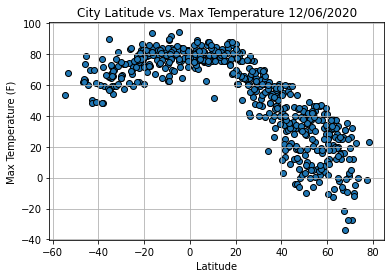

In [14]:
latitude = clean_city_data["Lat"]
max_temp = clean_city_data["Max Temp"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, max_temp, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs Max Temperature.png")
plt.show()

# Describe results
The closer you move to the equator (latitude =0), the higher the maximum temperature. The further you move away from the equator, the lower the maximum temperature. 

## Latitude vs. Humidity Plot

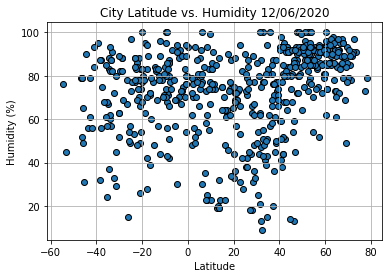

In [15]:
latitude = clean_city_data["Lat"]
humidity = clean_city_data["Humidity"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, humidity, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs. Humidity.png")
plt.show()

# Describe results
There seems to be no relationship between the humidity and latitude. There are several cities clustered around a latitude of 40-70 degrees and a humidity of 80 to 100.

## Latitude vs. Cloudiness Plot

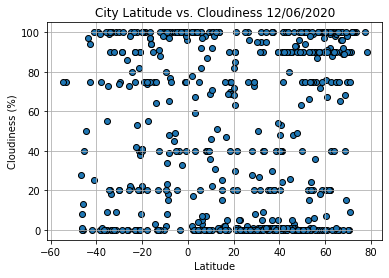

In [28]:
latitude = clean_city_data["Lat"]
cloudiness = clean_city_data["Cloudiness"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, cloudiness, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs. Cloudiness.png")
plt.show()

# Describe results
There is no clear relationship between cloudiness and latitude. Although, cities are clustered around each 20% interval of cloudiness across all latitudes.

## Latitude vs. Wind Speed Plot

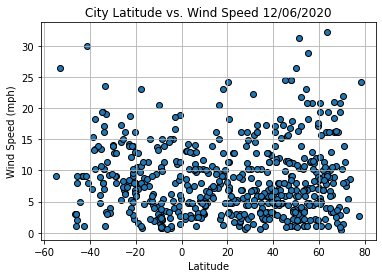

In [17]:
latitude = clean_city_data["Lat"]
winds = clean_city_data["Wind Speed"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, winds, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs. Wind Speed.png")
plt.show()

# Describe results
The majority of cities have wind speeds less than 15 mph.

## Linear Regression

In [18]:
#Use loc to get data for each hemisphere
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.736050208169913


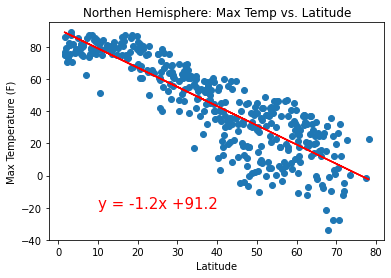

In [31]:
north_lat = northern_hemisphere["Lat"]
north_max_temp =northern_hemisphere["Max Temp"]
plt.scatter(north_lat, north_max_temp)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Northen Hemisphere: Max Temp vs. Latitude")

# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_max_temp)
fit = slope * north_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(north_lat, fit,"r-", color = "red")
plt.annotate(line_eq,(10,-20), fontsize = 15, color = "red")
plt.savefig("Northen Hemisphere-Max Temp vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

# Describe results
Since the r value is larger than .7, there is a strong positive relationship between maximum temperature and latitude in cities located in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3741206817424309


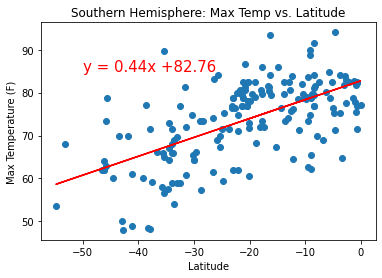

In [32]:
south_lat = southern_hemisphere["Lat"]
south_max_temp = southern_hemisphere["Max Temp"]
plt.scatter(south_lat, south_max_temp)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere: Max Temp vs. Latitude")
# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_max_temp)
fit = slope * south_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(south_lat, fit,"r-", color = "red")
plt.annotate(line_eq,(-50,85), fontsize = 15, color = "red")
plt.savefig("Southern Hemisphere-Max Temp vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

# Describe results
Since the r value is between .3 and .5, there is a weak positive relationship between maximum temperature and latitude in cities located in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18156957076368088


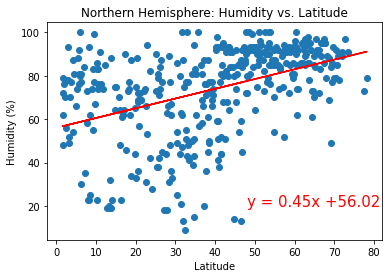

In [21]:
north_lat = northern_hemisphere["Lat"]
north_humidity =northern_hemisphere["Humidity"]
plt.scatter(north_lat,north_humidity)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere: Humidity vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_humidity)
fit = slope * north_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(north_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (48,20), fontsize = 15, color = "red")
plt.savefig("Northern Hemisphere-Humidity vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

# Describe the results
Since the r value is less than .3,but greater than .1 there is a very weak relationship between humidity and latitude in cities located in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03861005601348886


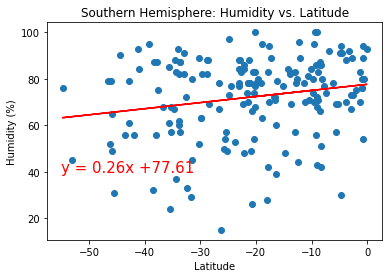

In [22]:
south_lat = southern_hemisphere["Lat"]
south_humidity = southern_hemisphere["Humidity"]
plt.scatter(south_lat,south_humidity)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere: Humidity vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_humidity)
fit = slope * south_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(south_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (-55,40), fontsize = 15, color = "red")
plt.savefig("Southern Hemisphere-Humidity vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

# Describe the results
Since the r value is less than .3, there is no relationship between cloudiness and latitude in cities located in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05188970641134004


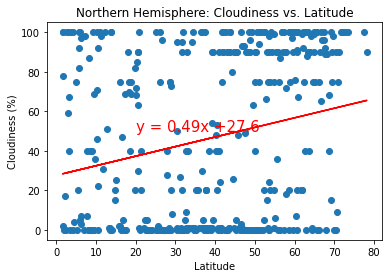

In [23]:
north_lat = northern_hemisphere["Lat"]
north_cloudiness =northern_hemisphere["Cloudiness"]
plt.scatter(north_lat,north_cloudiness)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_cloudiness)
fit = slope * north_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(north_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (20,50), fontsize = 15, color = "red")
plt.savefig("Northern Hemisphere-Cloudiness vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

# Describe the results
Since the r value is less than .3, there is no relationship between cloudiness and latitude in cities located in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06471886989579695


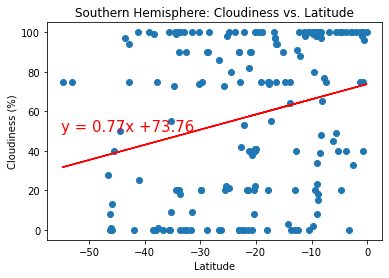

In [24]:
south_lat = southern_hemisphere["Lat"]
south_cloudiness = southern_hemisphere["Cloudiness"]
plt.scatter(south_lat,south_cloudiness)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_cloudiness)
fit = slope * south_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(south_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (-55,50), fontsize = 15, color = "red")
plt.savefig("Southern Hemisphere-Humidity vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

# Describe the results
Since the r value is less than .3, there is no relationship between cloudiness and latitude in cities located in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.020083036620091258


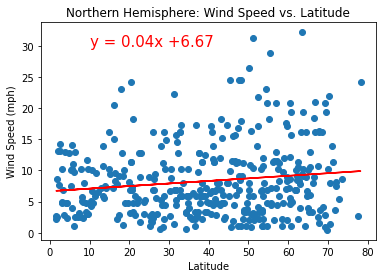

In [33]:
north_lat = northern_hemisphere["Lat"]
north_winds =northern_hemisphere["Wind Speed"]
plt.scatter(north_lat,north_winds)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_winds)
fit = slope * north_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(north_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (10,30), fontsize = 15, color = "red")
plt.savefig("Northern Hemisphere-Wind Speed vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

# Describe the results
Since the r value is less than .3, there is no relationship between wind speed and latitude in cities located in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.046510786428148196


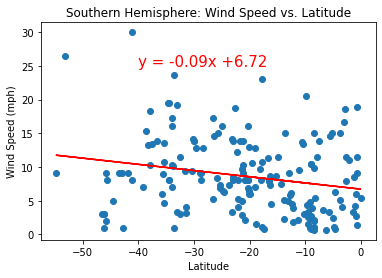

In [34]:
south_lat = southern_hemisphere["Lat"]
south_winds = southern_hemisphere["Wind Speed"]
plt.scatter(south_lat,south_winds)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_winds)
fit = slope * south_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(south_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (-40,25), fontsize = 15, color = "red")
plt.savefig("Southern Hemisphere-Wind Speed vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

# Describe the results
Since the r value is less than .3, there is no relationship between wind speed and latitude in cities located in the southern hemisphere.